Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 3: Stroj potpornih vektora i algoritam k-najbližih susjeda

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 9. studenog 2016.</i> 

Objavljeno: **9. studenog 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **14. studenog 2016.**

### Upute

Treća laboratorijska vježba sastoji se od sedam zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Klasifikator SVM

#### (a)

Upoznajte se s klasom [`svm.SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), koja ustvari implementira sučelje prema implementaciji [`libsvm`](http://www.csie.ntu.edu.tw/~cjlin/libsvm/). Primijenite model `SVC` s linearnom jezgrenom funkcijom (tj. bez preslikavanja primjera u prostor značajki) na skup podataka `seven` (dan niže) s $N=7$ primjera. Ispišite koeficijente $w_0$ i $\mathbf{w}$. Ispišite dualne koeficijente i potporne vektore. Završno, koristeći funkciju `mlutils.plot_2d_svc_problem` iscrtajte podatke, decizijsku granicu i marginu. Funkcija prima podatke, oznake i klasifikator (objekt klase `SVC`). Izračunajte širinu margine.

[ 3.99951172] [[ -9.99707031e-01  -2.92968750e-04]]
[[ -4.99707031e-01  -1.46484375e-04   4.99853516e-01]]
[[ 5.  2.]
 [ 5.  4.]
 [ 3.  2.]]
velicina margine -> [ 2.]


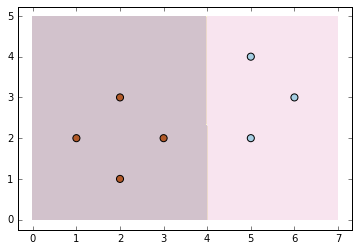

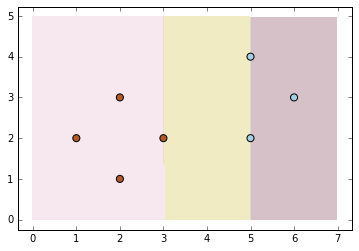

In [53]:
from sklearn.svm import SVC

seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

# Vaš kôd ovdje...
clf = SVC(kernel='linear')
clf.fit(seven_X,seven_y)
print clf.intercept_,clf.coef_
print clf.dual_coef_
print clf.support_vectors_
a = clf.decision_function([[3.,2.]])
b = clf.decision_function([[5.,4.]])
print 'velicina margine ->',a-b
mlutils.plot_2d_clf_problem(seven_X,seven_y,h=lambda x : clf.decision_function(x)<0)
plt.show()
mlutils.plot_2d_svc_problem(seven_X,seven_y,svc=clf)
plt.show()

**Q:** Koliko iznosi širina margine? <br>
**Q:** Koji primjeri su potporni vektori i zašto?

#### (b)

Definirajte funkciju `hinge(model, x, y)` koja izračunava gubitak zglobnice modela SVM (s linearnom jezgrom) na primjeru `x`. Izračunajte gubitke modela naučenog na skupu `seven` za primjere $\mathbf{x}^{(2)}=(3,2)$ i $\mathbf{x}^{(1)}=(3.5,2)$ koji su označeni pozitivno ($y=1$) te za $\mathbf{x}^{(3)}=(4,2)$ koji je označen negativno ($y=-1$). Također, izračunajte prosječni gubitak SVM-a na skupu `seven`. Uvjerite se da je rezultat identičan onome koji biste dobili primjenom ugrađene funkcije [`metrics.hinge_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html).

In [56]:
from sklearn.metrics import hinge_loss

def hinge(model, x, y):
    E = 0
    L = np.array([])
    for data in zip(x,y):
        h = model.decision_function([data[0]])
        loss = 1 - data[1]*h
        if loss <= 0:
            L = np.append(L,0)
        else :
            L = np.append(L,loss)
    return np.average(L)

print 'x2->',hinge(clf,x=np.array([[3,2]]),y=np.array([1]))
print 'x1->',hinge(clf,x=np.array([[3.5,2]]),y=np.array([1]))
print 'x3->',hinge(clf,x=np.array([[4,2]]),y=np.array([-1]))
print hinge(clf,seven_X,seven_y)
print hinge_loss(seven_y,clf.decision_function(seven_X))

x2-> 0.000195312499999
x1-> 0.500048828125
x3-> 1.00009765625
8.37053571429e-05
8.37053571429e-05


#### (c)

Vratit ćemo se na skupove podataka `outlier` ($N=8$) i `unsep` ($N=8$) iz prošle laboratorijske vježbe (dani niže) i pogledati kako se model SVM-a nosi s njima. Naučite ugrađeni model SVM-a (s linearnom jezgrom) na ovim podatcima i iscrtajte decizijsku granicu (skupa s marginom). Također ispišite točnost modela korištenjem funkcije [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [4]:
from sklearn.metrics import accuracy_score

outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

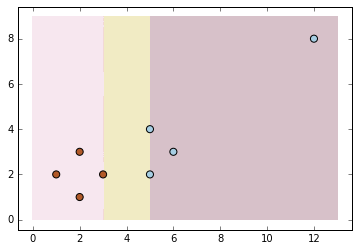

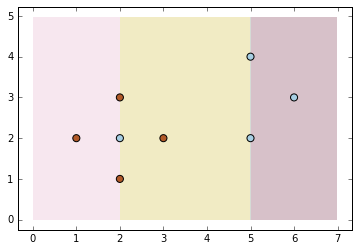

preciznost klasifikacije skupa outlier -> 1.0
preciznost klasifikacije skupa unsep -> 0.875


In [5]:
# Vaš kôd ovdje...
clf = SVC(kernel='linear')
clf.fit(outlier_X,outlier_y)
y_pred_outlier = clf.predict(outlier_X)
mlutils.plot_2d_svc_problem(outlier_X,outlier_y,clf)
plt.show()
clf.fit(unsep_X,unsep_y)
y_pred_unsep = clf.predict(unsep_X)
mlutils.plot_2d_svc_problem(unsep_X,unsep_y,clf)
plt.show()
#mlutils.plot_2d_clf_problem(unsep_X,unsep_y,h = lambda x: clf.decision_function(x) <0 )
print 'preciznost klasifikacije skupa outlier ->',accuracy_score(outlier_y,y_pred_outlier)
print 'preciznost klasifikacije skupa unsep ->',accuracy_score(unsep_y,y_pred_unsep)

**Q:** Zašto stršeća vrijednost ne utječe na SVM? <br>
**Q:** Kako se linearan SVM nosi s linearno neodvojivim skupom podataka? <br>
**Q:** Zašto SVM ipak uspjeva pronaći nekakvu granicu kod linearno neodvojivog problema, iako koristimo linearnu jezgru?

### 2. Nelinearan SVM

Ovaj zadatak pokazat će kako odabir jezgre utječe na kapacitet SVM-a. Na skupu `unsep` iz prošlog zadatka trenirajte tri modela SVM s različitim jezgrenim funkcijama: linearnom, polinomijalnom i radijalnom baznom (RBF) funkcijom. Varirajte parametar $C$ po vrijednostima $C\in\{10^{-2},1,10^2\}$, dok za ostale parametre (stupanj polinoma za polinomijalnu jezgru odnosno parametar $\gamma$ za jezgru RBF) koristite podrazumijevane vijednosti. Prikažite granice između klasa (i margine) na grafikonu organiziranome u polje $3x3$, gdje su stupci različite jezgre, a retci različite vrijednosti parametra $C$.

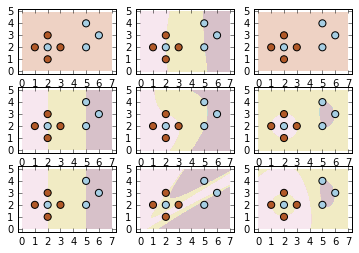

In [6]:
C = [1e-2,1,1e2]
model = ['linear','poly','rbf']
plt.figure(1)
i = 0
for param in C:
    for name in model:
        clf = SVC(C=param,kernel=name)
        clf.fit(unsep_X,unsep_y)
        plt.subplot(331+i)
        mlutils.plot_2d_svc_problem(unsep_X,unsep_y,clf)
        i+=1
        #print i
plt.show()

### 3. Optimizacija hiperparametara SVM-a

Pored hiperparametra $C$, model SVM s jezgrenom funkcijom RBF ima i dodatni hiperparametar $\gamma=\frac{1}{2\sigma^2}$ (preciznost). Taj parametar također određuje složenost modela: velika vrijednost za $\gamma$ znači da će RBF biti uska, primjeri će biti preslikani u prostor u kojem su (prema skalarnome produktu) međusobno vrlo različiti, što će rezultirati složenijim modelima. Obrnuto, mala vrijednost za $\gamma$ znači da će RBF biti široka, primjeri će biti međusobno sličniji, što će rezultirati jednostavnijim modelima. To ujedno znači da, ako odabremo veći $\gamma$, trebamo jače regularizirati model, tj. trebamo odabrati manji $C$, kako bismo spriječili prenaučenost. Zbog toga je potrebno zajednički optimirati hiperparametre $C$ i $\gamma$, što se tipično radi iscrpnim pretraživanjem po rešetci (engl. *grid search*). Ovakav pristup primjenjuje se kod svih modela koji sadrže više od jednog hiperparametra.


#### (a)

Definirajte funkciju 

> `grid_search(X_train, X_validate, y_train, y_validate, (c1,c2), (g1,g2), error_surface=False)` 

koja optimizira parametre $C$ i $\gamma$ pretraživanjem po rešetci. Funkcija treba pretražiti parametre $C\in\{2^{c_1},2^{c_1+1},\dots,2^{c_2}\}$ i $\gamma\in\{2^{g_1},2^{g_1+1},\dots,2^{g_2}\}$. Funkcija treba vratiti optimalne parametre $(C^*,\gamma^*)$, tj. one za koje na skupu za provjeru model ostvaruju najmanju pogrešku. Dodatno, ako je `surface=True`, funkcija treba vratiti matrice (tipa `ndarray`) pogreške modela (očekivanje gubitka 0-1) na skupu za učenje i skupu za provjeru. Svaka je matrica dimenzija $(c_2-c_1+1)\times(g_2-g_1+1)$ (retci odgovaraju različitim vrijednostima za $C$, a stupci različitim vrijednostima za $\gamma$).

In [7]:
from sklearn.metrics import accuracy_score, zero_one_loss

def grid_search(X_train, X_validate, y_train, y_validate, (c1,c2), (g1,g2), error_surface=False) :
    min_error = 100
    C_min = c1
    G_min = g1
    zero_one_train = np.array([])
    zero_one_val = np.array([])
    for i in range(c1,c2+1):
        row_train = np.array([])
        row_val = np.array([])
        for j in range(g1,g2+1):
            #treniraj model
            #print min_error
            clf = SVC(C=2**i,gamma=2**j)
            clf.fit(X_train,y_train)
            y_pred = clf.predict(X_train)
            y_pred_val = clf.predict(X_validate)
            
            #izracunaj ocekivanje gubitka 0-1
            z_train = zero_one_loss(y_train,y_pred)
            z_validate = zero_one_loss(y_validate,y_pred_val)
            if z_validate < min_error:
                min_error = z_validate
                C_min = i
                G_min = j
            row_train = np.append(row_train,z_train)
            row_val = np.append(row_val,z_validate)
        #print row
        if np.size(zero_one_train)==0:
            zero_one_train = np.append(zero_one_train,row_train)
        else:
            zero_one_train = np.vstack((zero_one_train,row_train))
        if np.size(zero_one_val)==0:
            zero_one_val = np.append(zero_one_val,row_val)
        else:
            zero_one_val = np.vstack((zero_one_val,row_val))
    if error_surface:
        return C_min, G_min, zero_one_train, zero_one_val
    else:
        return C_min,G_min

#### (b)

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte **dva** skupa podataka od $N=200$ primjera: jedan s $n=2$ dimenzije i drugi s $n=1000$ dimenzija. Primjeri neka dolaze iz dviju klasa, s time da svakoj klasi odgovaraju dvije grupe (`n_clusters_per_class=2`), kako bi problem bio nešto složeniji, tj. nelinearniji. Neka sve značajke budu informativne. Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1.

Na oba skupa optimirajte SVM s jezgrenom funkcijom RBF, u rešetci $C\in\{2^{-5},2^{-4},\dots,2^{15}\}$ i $\gamma\in\{2^{-15},2^{-14},\dots,2^{3}\}$. Prikažite površinu pogreške modela na skupu za učenje i skupu za provjeru, i to na oba skupa podataka (ukupno četiri grafikona) te ispišite optimalne kombinacije hiperparametara. Prikažite i granicu između klasa za dvodimenzijski skup. Za prikaz površine pogreške modela možete koristiti funkciju `plot_error_surface` iz paketa `mlutils`.

In [8]:
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split

x1, y1 = make_classification(n_samples=200,n_features=2, n_redundant=0,n_clusters_per_class=2, n_classes=2)
x2, y2 = make_classification(n_samples=200,n_features=1000,n_redundant=0,n_clusters_per_class=2,n_classes=2)
print np.shape(x1),np.shape(y1)
print np.shape(x2),np.shape(y2)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.5)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.5)

(200, 2) (200,)
(200, 1000) (200,)


n = 2
pogreska na skupu za ucenje


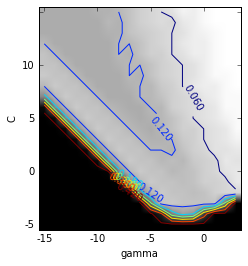

pogreska na skupu za validaciju


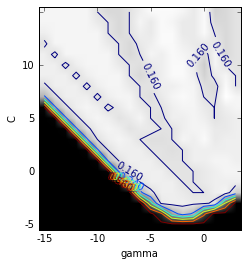

optimalni parametri C =  7  G =  2


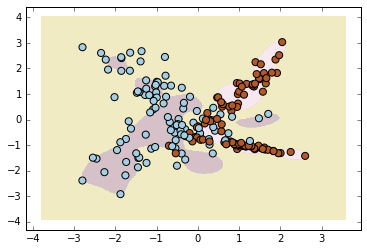


n = 1000
pogreska na skupu za ucenje


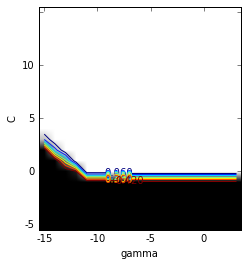

pogreska na skupu za validaciju


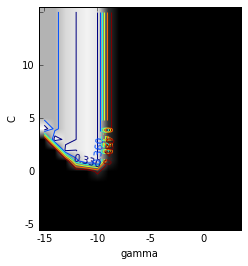

optimalni parametri C =  3  G =  -14


In [9]:
c1, g1, err_train1, err_test1 = grid_search(x1_train, x1_test, y1_train, y1_test, (-5,15), (-15,3), error_surface=True)
c2, g2, err_train2, err_test2 = grid_search(x2_train, x2_test, y2_train, y2_test, (-5,15), (-15,3), error_surface=True)
print 'n = 2'
print 'pogreska na skupu za ucenje'
mlutils.plot_error_surface(err_train1,(-5,15),(-15,3))
plt.show()
print 'pogreska na skupu za validaciju'
mlutils.plot_error_surface(err_test1,(-5,15),(-15,3))
plt.show()
clf = SVC(C=c1,gamma=g1)
clf.fit(x1_train,y1_train)
print 'optimalni parametri C = ',c1 , ' G = ',g1
mlutils.plot_2d_svc_problem(x1,y1,clf)
plt.show()
print 
print 'n = 1000'
print 'pogreska na skupu za ucenje'
mlutils.plot_error_surface(err_train2,(-5,15),(-15,3))
plt.show()
print 'pogreska na skupu za validaciju'
mlutils.plot_error_surface(err_test2,(-5,15),(-15,3))
plt.show()
print 'optimalni parametri C = ',c2 , ' G = ',g2

**Q:** Razlikuje li se površina pogreške na skupu za učenje i skupu za ispitivanje? Zašto? <br>
**Q:** U prikazu površine pogreške, koji dio površine odgovara prenaučenosti, a koji podnaučenosti? Zašto? <br>
**Q:** Kako broj dimenzija $n$ utječe na površinu pogreške, odnosno na optimalne hiperparametre $(C^*, \gamma^*)$? <br>
**Q:** Preporuka je da povećanje vrijednosti za $\gamma$ treba biti popraćeno smanjenjem vrijednosti za $C$. Govore li vaši rezultati u prilog toj preporuci? Obrazložite. <br>
**Q:** Podrazumijevana vrijednost parametara je $C=1$ i $\gamma=1/n$. Bi li te vrijednosti bile optimalne u ovom slučaju?

### 4. Utjecaj standardizacije značajki kod SVM-a

Za mnoge je modele bitno prije treniranja skalirati značajke, kako bi se spriječilo da značajke s većim numeričkim rasponima dominiraju nad onima s manjim numeričkim rasponima. To vrijedi i za SVM, kod kojega skaliranje nerijetko može znatno poboljšati rezultate. Svrha ovog zadataka jest eksperimentalno utvrditi utjecaj skaliranja značajki na točnost SVM-a.

Generirat ćemo dvoklasni skup od $N=500$ primjera s $n=2$ značajke, tako da je dimenzija $x_1$ većeg iznosa i većeg raspona od dimenzije $x_0$, te ćemo dodati jedan primjer koji vrijednošću značajke $x_1$ odskače od ostalih primjera:

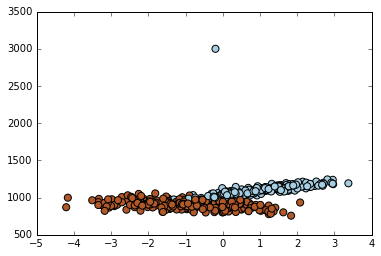

In [10]:
from sklearn.datasets import make_classification

def make_samples():
    X, y = make_classification(n_samples=500,n_features=2,n_classes=2,n_redundant=0,n_clusters_per_class=1)
    X[:,1] = X[:,1]*100+1000
    X[0,1] = 3000
    return X,y
X,y = make_samples()
mlutils.plot_2d_svc_problem(X, y)

#### (a)

Proučite funkciju za iscrtavanje histograma [`hist`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ (ovdje i u sljedećim zadatcima koristite `bins=50`).

In [11]:
print np.shape(X)
x0,x1 = np.hsplit(X,2)
print np.shape(x0),np.shape(x1)


(500, 2)
(500, 1) (500, 1)


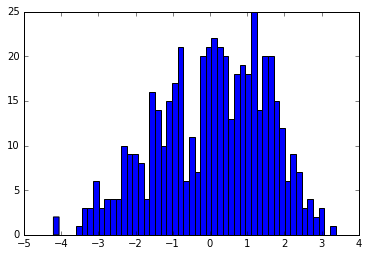

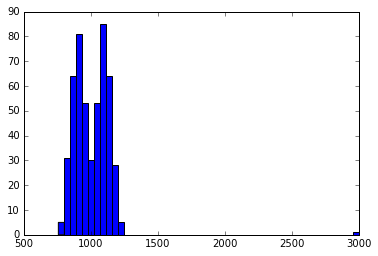

In [12]:
plt.hist(x0,bins=50)
plt.show()
plt.hist(x1,bins=50)
plt.show()

#### (b)

Proučite razred [`preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane min-max skaliranjem (ukupno dva histograma).

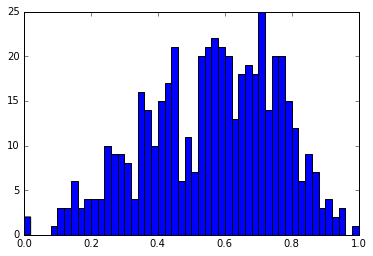

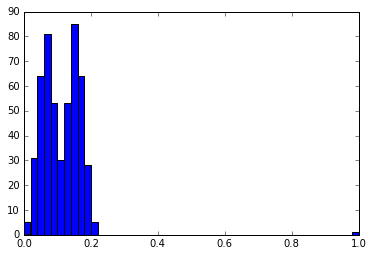

In [13]:
from sklearn.preprocessing import MinMaxScaler

pprs = MinMaxScaler()
pprs.fit(X)
x_new = pprs.fit_transform(X)
x0,x1 = np.hsplit(x_new,2)
plt.hist(x0,bins=50)
plt.show()
plt.hist(x1,bins=50)
plt.show()


**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (c)

Proučite razred [`preprocessing.StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane standardnim skaliranjem (ukupno dva histograma).

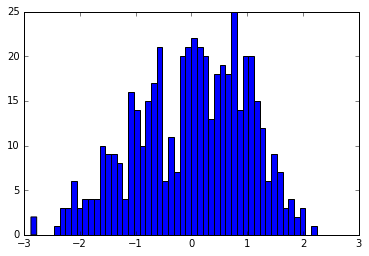

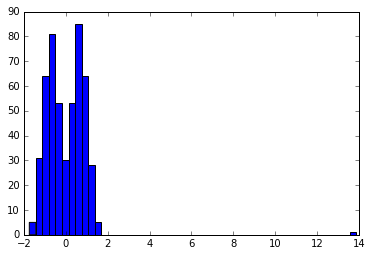

In [14]:
from sklearn.preprocessing import StandardScaler

stdscl = StandardScaler()
stdscl.fit(X)
x_new = stdscl.fit_transform(X)
x0,x1 = np.hsplit(x_new,2)
plt.hist(x0,bins=50)
plt.show()
plt.hist(x1,bins=50)
plt.show()

**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (d)

Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1. Trenirajte SVM s jezgrenom funkcijom RBF na skupu za učenje i ispitajte točnost modela na skupu za ispitivanje, koristeći tri varijante gornjeg skupa: neskalirane značajke, standardizirane značajke i min-max skaliranje. Koristite podrazumijevane vrijednosti za $C$ i $\gamma$. Izmjerite točnost svakog od triju modela na skupu za učenje i skupu za ispitivanje. Ponovite postupak više puta (npr. 30) te uprosječite rezultate (u svakom ponavljanju generirajte podatke kao što je dano na početku ovog zadatka).

**NB:** Na skupu za učenje treba najprije izračunati parametre skaliranja te zatim primijeniti skaliranje (funkcija `fit_transform`), dok na skupu za ispitivanje treba samo primijeniti skaliranje s parametrima koji su dobiveni na skupu za učenje (funkcija `transform`).

In [15]:
err_test = np.zeros((3,1))
err_train = np.zeros((3,1))

for i in range(30):
    X,y = make_samples()
    clf = SVC()
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
    
    clf.fit(x_train,y_train)
    err_train[0][0]+=accuracy_score(y_train,clf.predict(x_train))
    err_test[0][0] +=accuracy_score(y_test,clf.predict(x_test))
    
    min_max = MinMaxScaler()
    x_train_mm = min_max.fit_transform(x_train)
    x_test_mm = min_max.transform(x_test)
    clf.fit(x_train_mm,y_train)
    err_train[1][0] += accuracy_score(y_train,clf.predict(x_train_mm))
    err_test[1][0] += accuracy_score(y_test,clf.predict(x_test_mm))
    
    stdscl = StandardScaler()
    x_train_std = stdscl.fit_transform(x_train)
    x_test_std = stdscl.transform(x_test)
    clf.fit(x_train_std,y_train)
    err_train[2][0] += accuracy_score(y_train,clf.predict(x_train_std))
    err_test[2][0] += accuracy_score(y_test,clf.predict(x_test_std))

print 'greske pri treningu'
print err_train/30
print 'greske na validacijskom skupu'
print err_test/30

greske pri treningu
[[ 0.98493333]
 [ 0.9172    ]
 [ 0.9624    ]]
greske na validacijskom skupu
[[ 0.83533333]
 [ 0.91613333]
 [ 0.95973333]]


**Q:** Jesu li rezultati očekivani? Obrazložite. <br>
**Q:** Bi li bilo dobro kada bismo funkciju `fit_transform` primijenili na cijelom skupu podataka? Zašto? Bi li bilo dobro kada bismo tu funkciju primijenili zasebno na skupu za učenje i zasebno na skupu za ispitivanje? Zašto?

### 5. k-najbližih susjeda

U ovom zadatku promatrat ćemo jednostavan klasifikacijski model imena **algoritam k-najbližih susjeda**. Najprije ćete ga samostalno isprogramirati kako biste se detaljno upoznali s radom ovog modela, a zatim ćete prijeći na analizu njegovih hiperparametara (koristeći ugrađeni razred, zbog efikasnosti).

#### (a)

Implementirajte klasu `KNN` koja implementira algoritam $k$ najbližih susjeda. Neobavezan parametar konstruktora jest broj susjeda `n_neighbours` ($k$), čija je podrazumijevana vrijednost 3. Definirajte metode `fit(X, y)` i `predict(X)`, koje služe za učenje modela odnosno predikciju. Kao mjeru udaljenosti koristite euklidsku udaljenost ([`scipy.linalg.norm`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.norm.html); pripazite na parametar `axis`). Nije potrebno implementirati nikakvu težinsku funkciju.

In [16]:
from scipy.linalg import norm
from bisect import insort
import operator
from collections import Counter
class KNN:
    def __init__(self, n_neighbors=3):
        self.n = n_neighbors
        
    def fit(self, X_train, y_train):
        """The training phase of the algorithm
        consists only of storing the feature vectors
        and class labels of the training samples."""
        self.x = X_train
        self.y = y_train
        
    def predict(self, X_test):
        y_test = list()
        for x in X_test:
            closest = list()
            for i in range(len(self.x)):
                d = norm(self.x[i]-x)
                closest.append((self.y[i],d))
            closest.sort(key = operator.itemgetter(1))
            closest = closest[:self.n]
            counts = Counter(tup[0] for tup in closest)
            closest.sort(key = lambda tup: counts[tup[0]], reverse=True)
            y_test.append(closest[0][0])
        return y_test

#### (b)

Kako biste se uvjerili da je Vaša implementacija ispravna, usporedite ju s ugrađenom implementacijom u razredu [`neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Budući da spomenuti razred koristi razne optimizacijske trikove pri pronalasku najboljih susjeda, obavezno postavite parametar `algorithm=brute`, jer bi se u protivnom moglo dogoditi da Vam se predikcije razlikuju. Usporedite modele na sljedećem (umjetnom) skupu podataka:

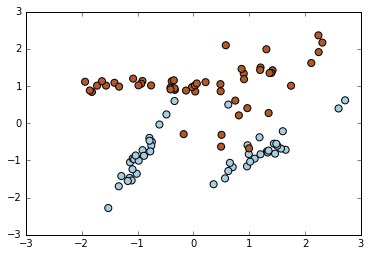

In [17]:
from sklearn.datasets import make_classification
X_art, y_art = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
mlutils.plot_2d_clf_problem(X_art, y_art)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNN()
knn_ = KNeighborsClassifier(n_neighbors=3,algorithm='brute')
knn_.fit(X_art,y_art)
knn.fit(X_art,y_art)
print accuracy_score(knn.predict(X_art),knn_.predict(X_art))


1.0


#### (c)

Pomoću funkcije `mlutils.plot_2d_clf_problem` iscrtajte prostor primjera i područja koja odgovaraju prvoj odnosno drugoj klasi. Eksperimentirajte s različitim vrijednostima za broj primjera $N$, broj susjeda $k$ i broj klasa $K$.

**NB:** Implementacija algoritma `KNeighborsClassifier` iz sklearna vjerojatno će raditi brže od Vaše implementacije, pa koristite nju za iscrtavanje grafa. Naime, za iscrtavanje grafa potrebno je napraviti predikciju za svaku točku u regiji iscrtavanja.

broj klasa : K= 2   broj najblizih susjeda k= 3


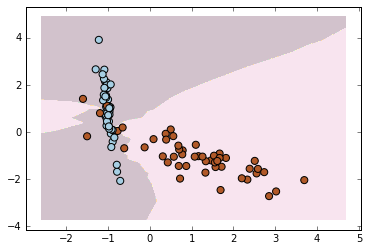

broj klasa : K= 2   broj najblizih susjeda k= 5


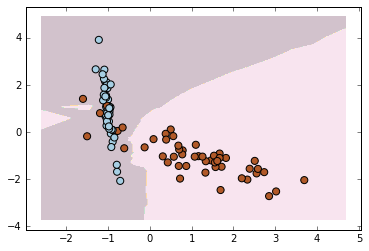

broj klasa : K= 2   broj najblizih susjeda k= 10


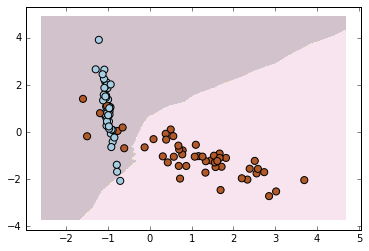

broj klasa : K= 2   broj najblizih susjeda k= 15


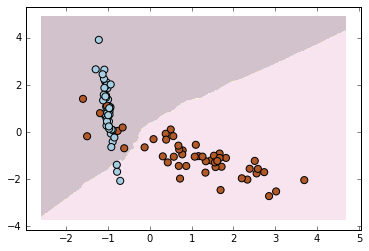

broj klasa : K= 2   broj najblizih susjeda k= 30


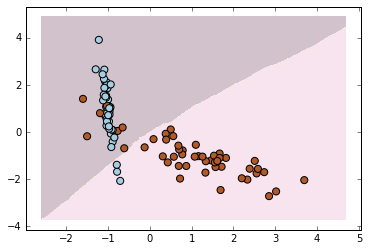

broj klasa : K= 3   broj najblizih susjeda k= 3


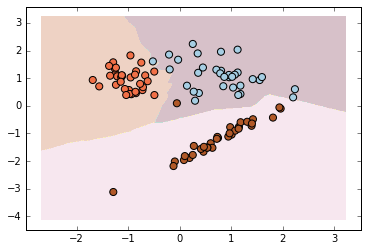

broj klasa : K= 3   broj najblizih susjeda k= 5


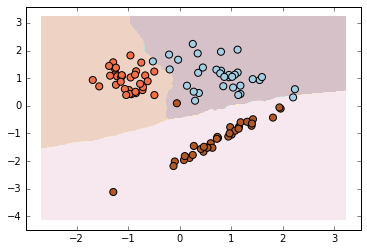

broj klasa : K= 3   broj najblizih susjeda k= 10


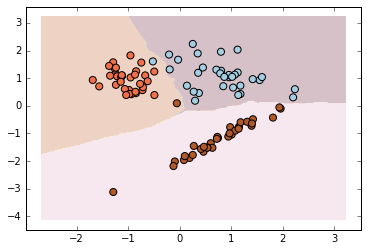

broj klasa : K= 3   broj najblizih susjeda k= 15


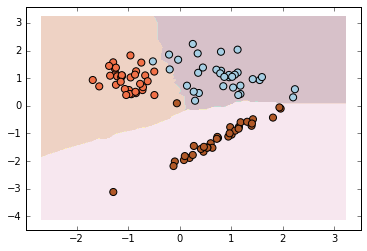

broj klasa : K= 3   broj najblizih susjeda k= 30


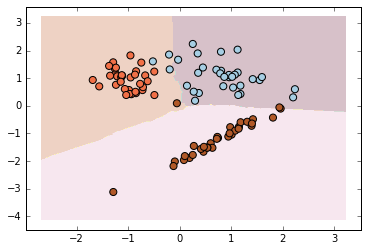

In [19]:
k = [3,5,10,15,30]
K = [2,3]
for i in K:
    X, y = make_classification(n_samples=100, n_features=2, n_classes=i, n_redundant=0, n_clusters_per_class=1)
    for n in k:
        knn = KNeighborsClassifier(n_neighbors=n,algorithm='brute')
        knn.fit(X,y)
        print 'broj klasa : K=',i, '  broj najblizih susjeda k=',n
        mlutils.plot_2d_clf_problem(X,y,h=lambda x: knn.predict(x))
        plt.show()

**Q:** Kako $k$ utječe na izgled granice između klasa? A broj primjera $N$?

### 6. Analiza algoritma k-najbližih susjeda

Algoritam k-nn ima hiperparametar $k$ (broj susjeda). Taj hiperparametar izravno utječe na složenost algoritma, pa je stoga izrazito važno dobro odabrati njegovu vrijednost. Kao i kod mnogih drugih algoritama, tako i kod algoritma k-nn optimalna vrijednost hiperametra $k$ ovisi o konkretnom problemu, uključivo broju primjera $N$, broju značajki (dimenzija) $n$ te broju klasa $K$.

#### (a)

Kako bismo dobili pouzdanije rezultate, potrebno je mjerenja ponoviti na različitim skupovima podataka i zatim uprosječiti dobivene vrijednosti pogrešaka. Definirajte funkciju

> `knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100)`

koja trenira i ispituje model k-nn na ukupno `n_instances` primjera, i to tako da za svaku vrijednost hiperparametra iz zadanog intervala `k_range` ponovi `n_trials` mjerenja, generirajući za svako od njih nov skup podataka pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) i dijeleći ga na skup za učenje i skup za ispitivanje koristeći funkciju [`sklearn.cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Udio skupa za ispitivanje definiran je parametrom `test_size`. Vrijednosti parametara `n_instances`, `n_features`, `n_classes` i `n_informative` proslijedite funkciji `make_classification` te dodatno postavite `n_redundant=0` i `n_clusters_per_class=1`. Povratne vrijednosti funkcije jest trojka `(best_k, train_errors, test_errors)`. Vrijednost `best_k` je optimalna vrijednost hiperparametra $k$ (vrijednost za koju je pogreška na skupu za ispitivanje najmanja). Vrijednosti `train_errors` i `test_errors`  liste su pogrešaka na skupu za učenja odnosno skupu za testiranje za sve razmatrane vrijednosti hiperparametra $k$.

In [35]:
from sklearn.cross_validation import train_test_split

def knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100):
    best_k,train_errors,test_errors = 0,list(),list()
    min_error = 1e10
    for k in range(k_range[0],k_range[1]+1):
        train_error, test_error = 0, 0
        for i in range(n_trials):
            x , y = make_classification(n_samples=n_instances,n_classes=n_classes,n_informative=n_informative,n_redundant=0,n_clusters_per_class=1)
            x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size)
            knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
            knn.fit(x_train,y_train)
            train_error += zero_one_loss(y_train,knn.predict(x_train))
            test_error += zero_one_loss(y_test,knn.predict(x_test))
        train_error /= n_trials
        test_error /= n_trials
        if test_error < min_error:
            best_k = k
            min_error = test_error
        train_errors.append(train_error)
        test_errors.append(test_error)
    return best_k, train_errors, test_errors
            

#### (b)

Pomoću funkcije `knn_eval` iz (a) dijela zadatka, iscrtajte pogrešku učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=200$ primjera. Ispišite i optimalnu vrijednost za $k$.

Najbolji k =  14


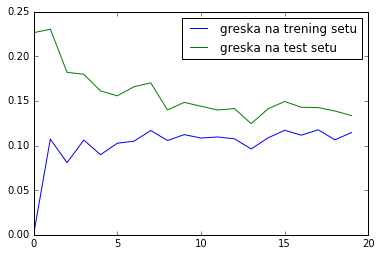

In [36]:
best_k , train_errors, test_errors = knn_eval(n_instances=200)
print 'Najbolji k = ',best_k
plt.plot(train_errors,label='greska na trening setu')
plt.plot(test_errors,label='greska na test setu')
plt.legend(loc=1)
plt.show()

**Q:** Kojem području odgovara prenaučenost, a kojem podnaučenost modela? Zašto? <br>
**Q:** Je li uvijek moguće doseći pogrešku od 0 na skupu za učenje?

#### (c)

Pomoću funkcije `knn_eval` iz (a) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=\{100, 500, 1000, 3000\}$ primjera. Načinite 4 zasebna grafikona (generirajte ih u 2x2 polju). U svakoj iteraciji ispišite optimalnu vrijednost hiperparametra $k$ (najlakše kao naslov grafikona).

broj primjera 100
najbolji k= 19


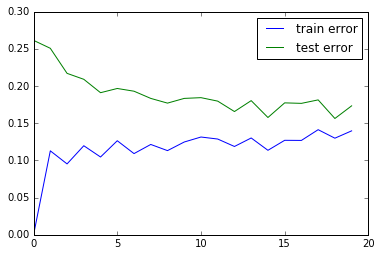

broj primjera 500
najbolji k= 19


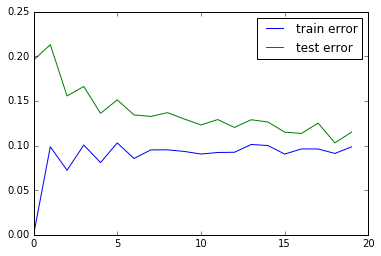

broj primjera 1000
najbolji k= 15


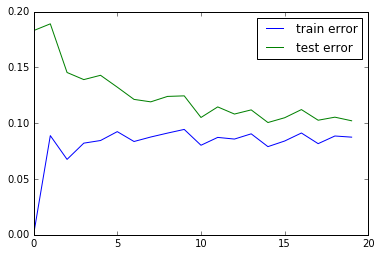

broj primjera 3000
najbolji k= 14


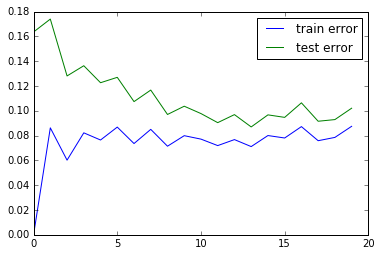

In [27]:
N = [100,500,1000,3000]

i = 0
for n in N :
    print 'broj primjera',n
    best_k , train_errors, test_errors = knn_eval(n_instances=n)
    print 'najbolji k=',best_k
    plt.plot(train_errors,label='train error')
    plt.plot(test_errors,label='test error')
    plt.legend(loc=1)
    plt.show()

### 7. Nerobusnost algoritma k-nn

Svrha ovog zadatka jest analizirati u kojoj je mjeri algoritam k-nn osjetljiv na razlike u mjernoj skali između pojedinih dimenzija te na prisutnost nebitnih značajki.

#### (a)

Krenite od umjetnog skupa podataka danog u nastavku. Zatim napravite kopiju tog skupa podataka (pogledajte [`copy.deepcopy`](https://docs.python.org/2/library/copy.html#copy.deepcopy)) i preinačite ju tako da jednu dimenziju pomnožite sa 100. Oba skupa podijelite na skup za učenje i skup za ispitivanje u omjeru 7:3, pri čemu obratite pozornost na to da oba skupa podijelite na identičan način. Trenirajte modele k-nn na skaliranoj i neskaliranoj inačici skupa za učenje (s pretpostavljenim parametrima), a zatim ispitajte model na odgovarajućim ispitnim inačicama skupova.

In [37]:
from copy import deepcopy
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
x_copy = deepcopy(X)
y_copy = deepcopy(y)
x_copy[:,1]*=100
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.3)
x_train_copy, x_test_copy, y_train_copy, y_test_copy = train_test_split(x_copy,y_copy,train_size=0.3)

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
error = zero_one_loss(y_test,knn.predict(x_test))
print error
knn.fit(x_train_copy,y_train_copy)
error_ = zero_one_loss(y_test_copy,knn.predict(x_test_copy))
print error_

0.107142857143
0.45


**Q:** Zašto je ovaj problem tako izražen kod algoritma k-nn?

#### (b)

Kako bismo provjerili u kojoj je mjeri algoritam k-nn osjetljiv na prisustvo nebitnih značajki, možemo iskoristiti funkciju `make_classification` kako bismo generirali skup primjera kojemu su neke od značajki nebitne. Naime, parametar `n_informative` određuje broj bitnih značajki, dok parametar `n_features` određuje ukupan broj značajki. Ako je `n_features > n_informative`, onda će neke od značajki biti nebitne. Umjesto da izravno upotrijebimo funkciju `make_classification`, upotrijebit ćemo funkciju `knn_eval` iz zadatka (7a), jer ćemo na taj način dobiti pouzdanije procjene.

Koristite funkciju `knn_eval` na dva načina. U oba koristite $N=1000$ primjera, $n=10$ značajki i $K=5$ klasa, ali za prvi neka su svih 10 značajki bitne, a za drugi neka je bitno samo 5 od 10 značajki. Ispišite pogreške učenja i ispitivanja za oba modela za optimalnu vrijednost $k$ (vrijednost za koju je ispitna pogreška najmanja).

12


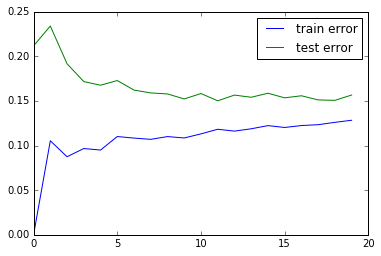

16


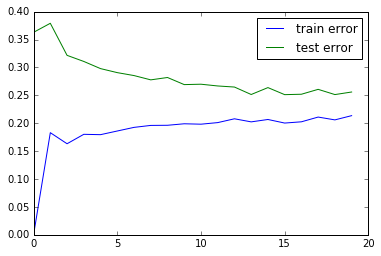

In [39]:
best_k, train_errors, test_errors = knn_eval(n_instances=1000, n_features=10, n_classes=5, n_informative=10)
print best_k
plt.plot(train_errors,label='train error')
plt.plot(test_errors,label='test error')
plt.legend(loc=1)
plt.show()

best_k, train_errors, test_errors = knn_eval(n_instances=1000, n_features=10, n_classes=5, n_informative=5)
print best_k
plt.plot(train_errors,label='train error')
plt.plot(test_errors,label='test error')
plt.legend(loc=1)
plt.show()

**Q:** Zašto nebitne značajke ovoliko utječu na perfomanse modela?